# Classe base

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

class Automato:
    
    def __init__(self, Number_of_Steps=5, Rule=30, Random = False):#Main
        self.Number_of_Steps = Number_of_Steps
        self.Rule = Rule
        self.Random = Random
        
        self.Width = 2*self.Number_of_Steps + 1 #Garante que Width é ímpar e, portanto,
        #temos uma única célula no centro

#         print('Passo 1')
        self.Cellular_Automaton = self.FirstStep()

        for i in range(Number_of_Steps-1):
#             print('Passo ' + str(i+2))
            self.Cellular_Automaton = self.Step(self.Cellular_Automaton)

    def FirstStep(self):#Initiate_Cellular_Automaton
        '''
        Cria condição inicial (chamado de "step 1" pelo Wolfram) de uma única
        célula preta no centro do autômato.

    -------------------------------------------------------------------------------
        Inputs:
            Width: Número de células do autômato, i.e., largura da malha.

    -------------------------------------------------------------------------------
        Outputs:
            First_Step: Autômato na condiação inicial.
        '''

        if self.Random:
            First_Step = np.random.randint(0,2, (1,self.Width))

        else:
            First_Step = np.full((1, self.Width), 0)
            First_Step[0][int(self.Width/2)] = 1

        return First_Step

    def Step(self,Cellular_Automaton):
        '''
        Aplica a Regra n ∈ [0, 255]
    -------------------------------------------------------------------------------
        Inputs:
            self.Cellular_Automaton: evolução do autômato até o atual n-ésimo passo como
            array (n, Width).
    -------------------------------------------------------------------------------
        Outputs:
            Autômato concatenado com novo passo, resultando em array (n+1, Width).
        '''

        Rule_Bin = np.binary_repr(self.Rule, 8) #Representação binária de 8 bits da regra em string
        #Ex: '01101110' pra Regra 110

        Rule_Bin = np.array([int(_) for _ in Rule_Bin], dtype=np.int8) #Iterando sobre a string para separar os 0's e 1's
        #Ex: [0,1,1,0,1,1,1,0] pra Regra 110

        New_Step = np.vstack((np.roll(Cellular_Automaton[-1:],-1), Cellular_Automaton[-1:], np.roll(Cellular_Automaton[-1:],1))).astype(np.int8)
        #[[0,0,0,1,0,0,0,0,0],
        # [0,0,0,0,1,0,0,0,0],
        # [0,0,0,0,0,1,0,0,0]]    

        u = np.array([[4],[2], [1]])
        #[[4],
        # [2],
        # [1]]

        New_Step = u*New_Step #Multiplica column-wise
        #[[0,0,0,4,0,0,0,0,0],
        # [0,0,0,0,2,0,0,0,0],
        # [0,0,0,0,0,1,0,0,0]] 

        New_Step = np.sum(New_Step, axis= 0).astype(np.int8) #Soma row-wise
        #[0,0,0,4,2,1,0,0,0]

        New_Step = np.array([Rule_Bin[7 - New_Step]]) #Aplica a regra
        #[0,0,0,0,1,1,0,0,0]
        return np.concatenate((Cellular_Automaton, New_Step))

    def Plot(self, Save=False):
        '''
        Gera imagem da evolução do autômato em todos os passos.

    -------------------------------------------------------------------------------
            evolução do autômato celular ao longo de todos os
            passos na forma de um array (número de passo, 2*número de passo + 1) 
            de zeros (casas brancas) e uns (casas pretas).
        '''

        Number_of_Steps = self.Cellular_Automaton.shape[0]

        Plot_Width = 20
        fig, axs = plt.subplots(1, 1, figsize=(Plot_Width+1, (Plot_Width-1)/2))
        plt.title("Regra "+str(self.Rule), fontsize = 50)
        axs.pcolormesh(np.flip(self.Cellular_Automaton), edgecolors = 'white', cmap = 'binary', label = 'Passos Totais: '+str(Number_of_Steps),linewidths =5/self.Number_of_Steps)

        plt.axis('off')
        
        axs.grid(color='white', ls='solid')
        axs.grid(True)
        axs.set_xlabel('X [pixels]')
        axs.set_ylabel('Y [pixels]')
        plt.tight_layout()
        if Save:
            # Não sobrescrever imagem
            outfilename = 'Regra'+str(self.Rule)+'_'+str(Number_of_Steps)+'passos_'
            i = 0
            while os.path.exists(outfilename + str(i) + '.png'):
                i += 1

            plt.savefig(outfilename + str(i) + '.pdf', bbox_inches='tight', dpi=300)
        
        plt.show()
        return plt.figure()

## Visualização das Regras Propostas

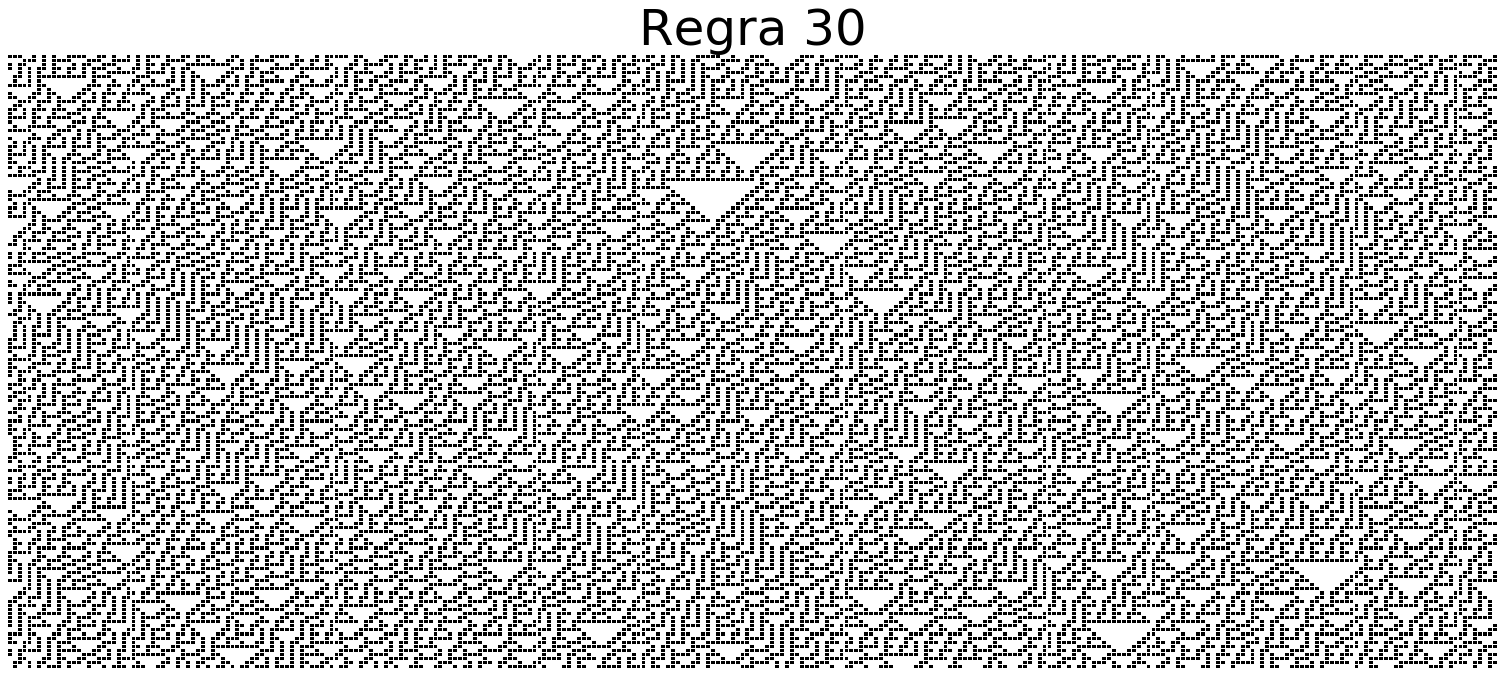

<Figure size 432x288 with 0 Axes>

In [121]:
n = 150
Random = True

# Steps, Rule = n, 0 
# Rule_0 = Automato(Steps, Rule, Random)
# fig = Rule_0.Plot()

# Steps, Rule = n, 222 
# Rule_222 = Automato(Steps, Rule, Random)
# fig = Rule_222.Plot()

Steps, Rule = n, 30 
Rule_30 = Automato(Steps, Rule, Random)
fig = Rule_30.Plot()

# Steps, Rule = n, 110 
# Rule_110 = Automato(Steps, Rule, Random)
# fig = Rule_110.Plot()

# Comparação visual da influência da seed inicial na evolução 


### Fiz o cálculo da linha menos a anterior para identificar o surgimento de padrões

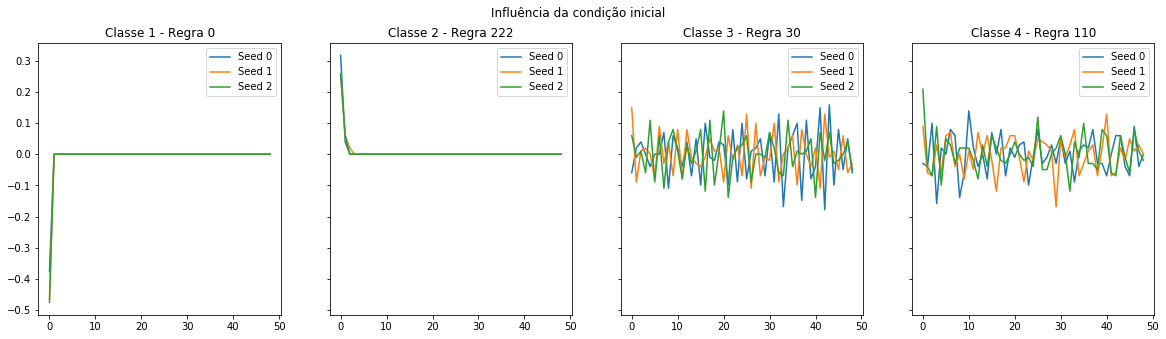

In [127]:
steps,random = 50, True

fig, [axs1,axs2,axs3, axs4] = plt.subplots(1, 4, figsize=(20, 5), sharey = True)
fig.suptitle("Influência da condição inicial")

for seeds in range(3):

    rule_0 = Automato(steps, 0, random)
    rule_222 = Automato(steps, 222, random)
    rule_30 = Automato(steps, 30, random)
    rule_110 = Automato(steps, 110, random)



    C1,C2,C3,C4 = [],[],[],[]

    for i in range(1,steps):
        C1.append(np.mean(rule_0.Cellular_Automaton[i]-rule_0.Cellular_Automaton[i-1]))
        C2.append(np.mean(rule_222.Cellular_Automaton[i]-rule_222.Cellular_Automaton[i-1]))
        C3.append(np.mean(rule_30.Cellular_Automaton[i]-rule_30.Cellular_Automaton[i-1]))
        C4.append(np.mean(rule_110.Cellular_Automaton[i]-rule_110.Cellular_Automaton[i-1]))

    axs1.plot(C1, label= "Seed %d" %(seeds))
    #     axs1.set_title("Histogram")
    #     axs1.hist(L, density=True, facecolor='g', alpha=0.75)
    axs2.plot(C2, label= "Seed %d" %(seeds))
    #axs2.set_xlim(0,len(L))
    axs3.plot(C3, label= "Seed %d"%(seeds))
    #axs3.set_xlim(0,len(L))
    axs4.plot(C4, label= "Seed %d" %(seeds))

    
axs1.set_title("Classe 1 - Regra 0")
axs2.set_title("Classe 2 - Regra 222")
axs3.set_title("Classe 3 - Regra 30")
axs4.set_title("Classe 4 - Regra 110")

i = 1
for ax in [axs1,axs2,axs3, axs4]:
    ax.legend()
    i+=1
    
#plt.savefig("anal_classes_e_seeds.png", dpi = 200)
plt.show()


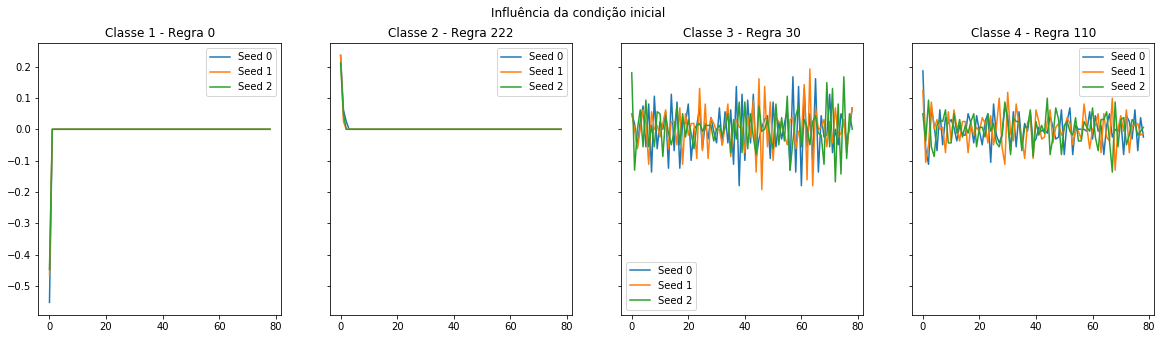

In [126]:
steps,random = 80, True

fig, [axs1,axs2,axs3, axs4] = plt.subplots(1, 4, figsize=(20, 5), sharey = True)
fig.suptitle("Influência da condição inicial")

for seeds in range(3):

    rule_0 = Automato(steps, 0, random)
    rule_222 = Automato(steps, 222, random)
    rule_30 = Automato(steps, 30, random)
    rule_110 = Automato(steps, 110, random)



    C1,C2,C3,C4 = [],[],[],[]

    for i in range(1,steps):
        C1.append(np.mean(rule_0.Cellular_Automaton[i]-rule_0.Cellular_Automaton[i-1]))
        C2.append(np.mean(rule_222.Cellular_Automaton[i]-rule_222.Cellular_Automaton[i-1]))
        C3.append(np.mean(rule_30.Cellular_Automaton[i]-rule_30.Cellular_Automaton[i-1]))
        C4.append(np.mean(rule_110.Cellular_Automaton[i]-rule_110.Cellular_Automaton[i-1]))

    axs1.plot(C1, label= "Seed %d" %(seeds))
    #     axs1.set_title("Histogram")
    #     axs1.hist(L, density=True, facecolor='g', alpha=0.75)
    axs2.plot(C2, label= "Seed %d" %(seeds))
    #axs2.set_xlim(0,len(L))
    axs3.plot(C3, label= "Seed %d"%(seeds))
    #axs3.set_xlim(0,len(L))
    axs4.plot(C4, label= "Seed %d" %(seeds))

    
axs1.set_title("Classe 1 - Regra 0")
axs2.set_title("Classe 2 - Regra 222")
axs3.set_title("Classe 3 - Regra 30")
axs4.set_title("Classe 4 - Regra 110")

i = 1
for ax in [axs1,axs2,axs3, axs4]:
    ax.legend()
    i+=1
    
#plt.savefig("anal_classes_e_seeds.png", dpi = 200)
plt.show()


# Visualização de outras regras de uma mesma classe 

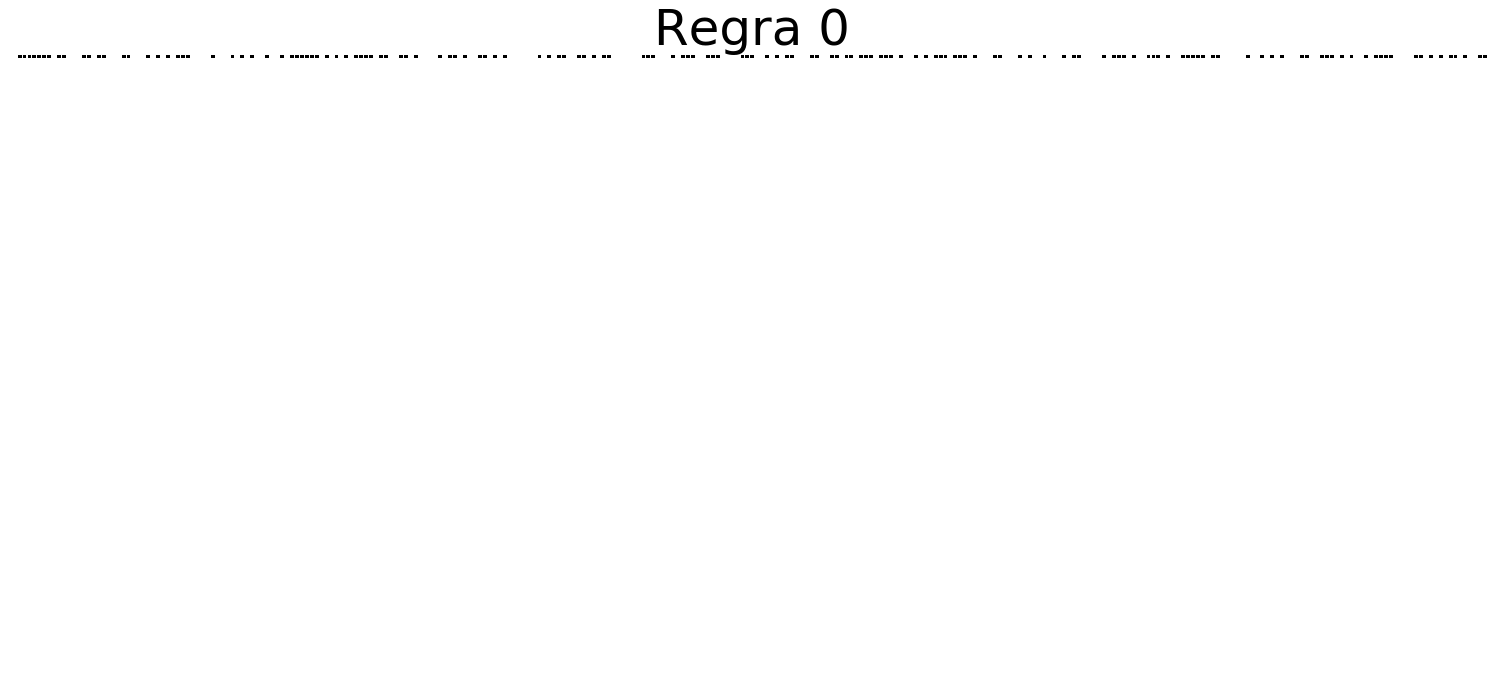

<Figure size 432x288 with 0 Axes>

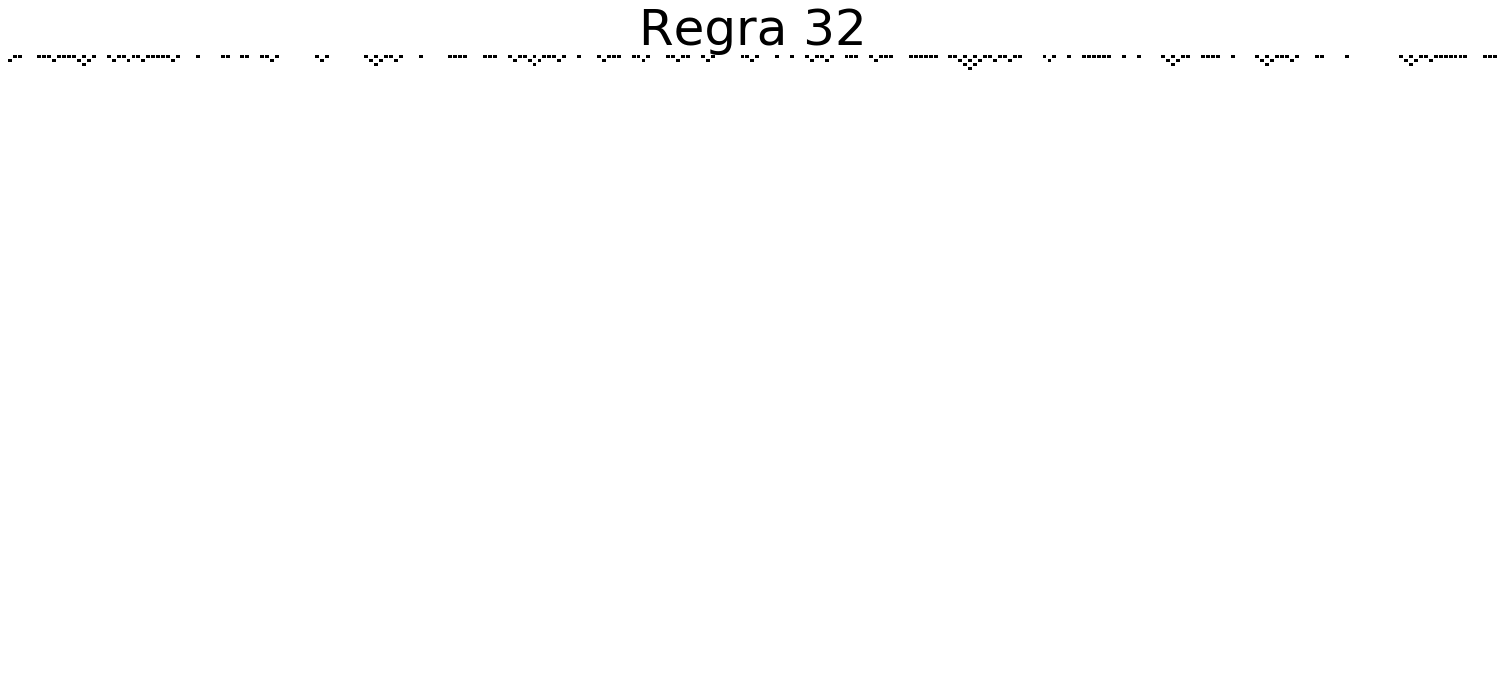

<Figure size 432x288 with 0 Axes>

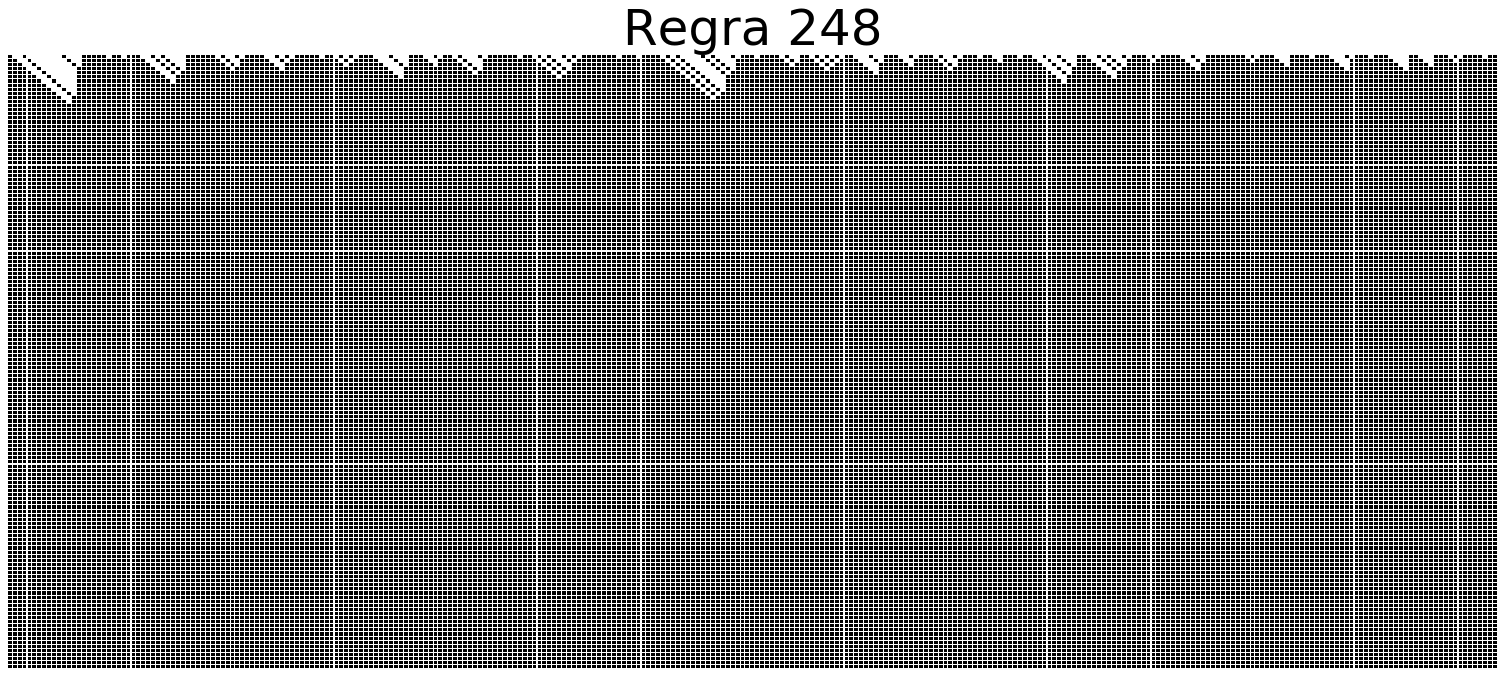

<Figure size 432x288 with 0 Axes>

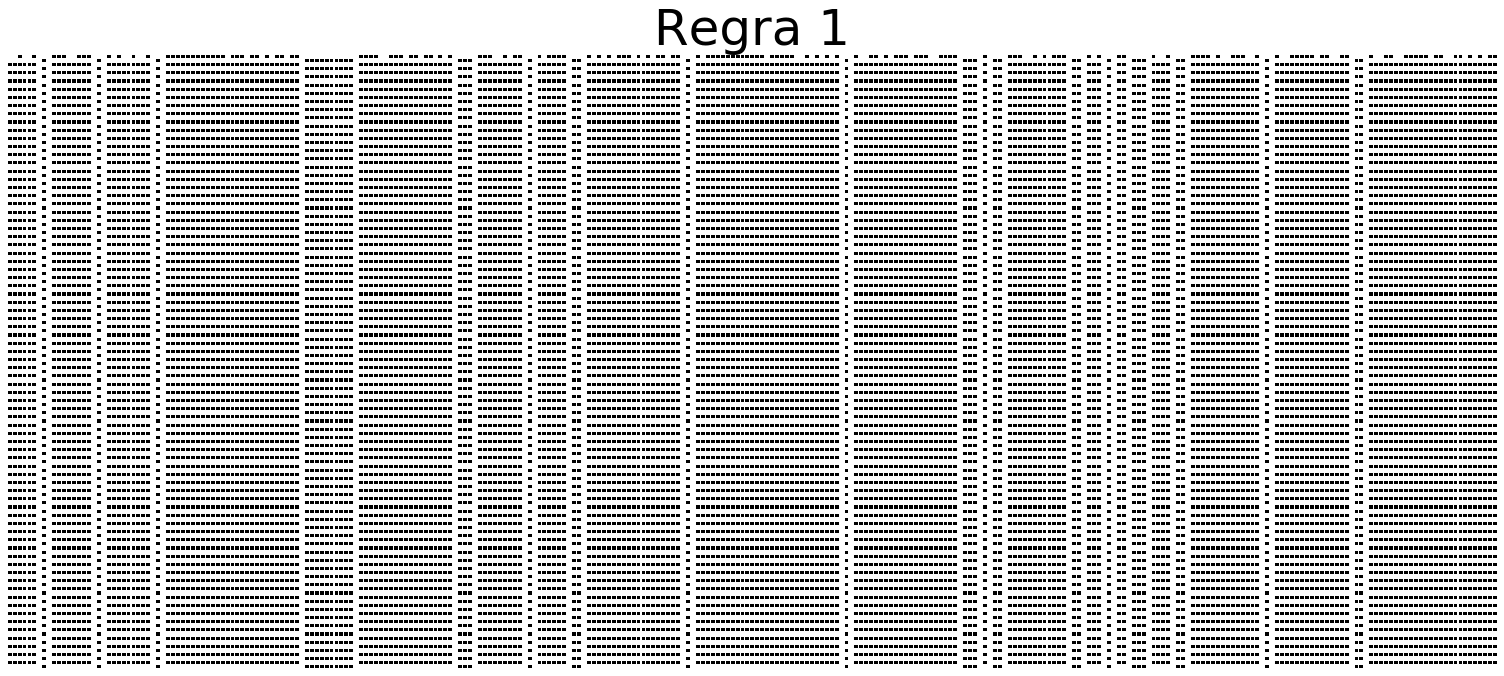

<Figure size 432x288 with 0 Axes>

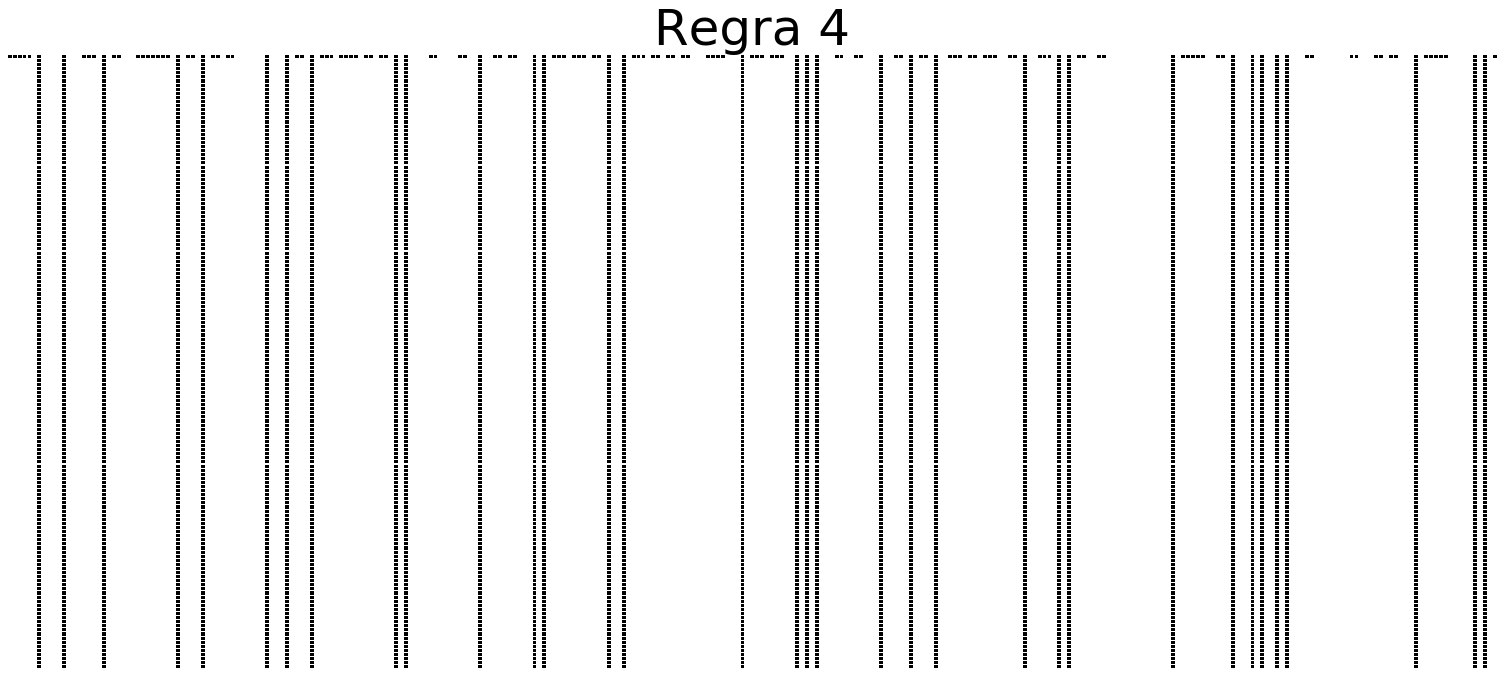

<Figure size 432x288 with 0 Axes>

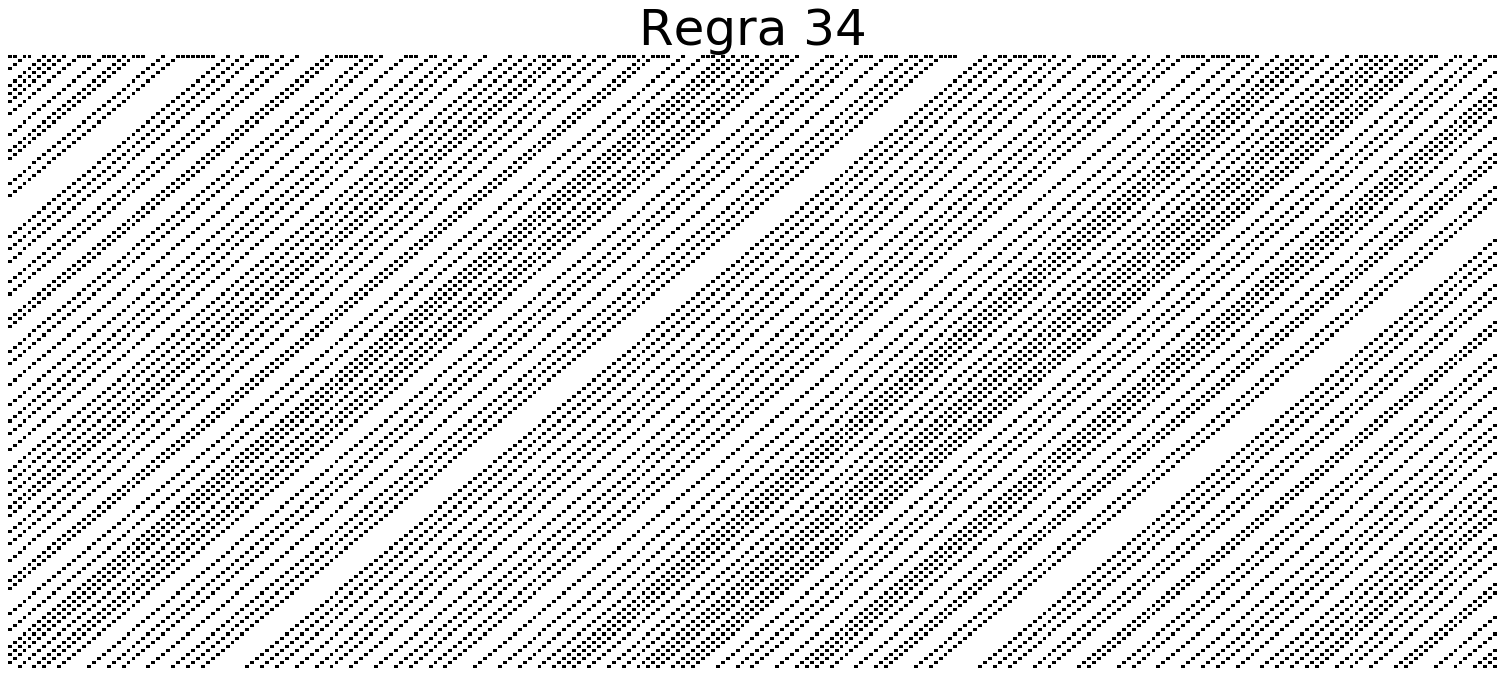

<Figure size 432x288 with 0 Axes>

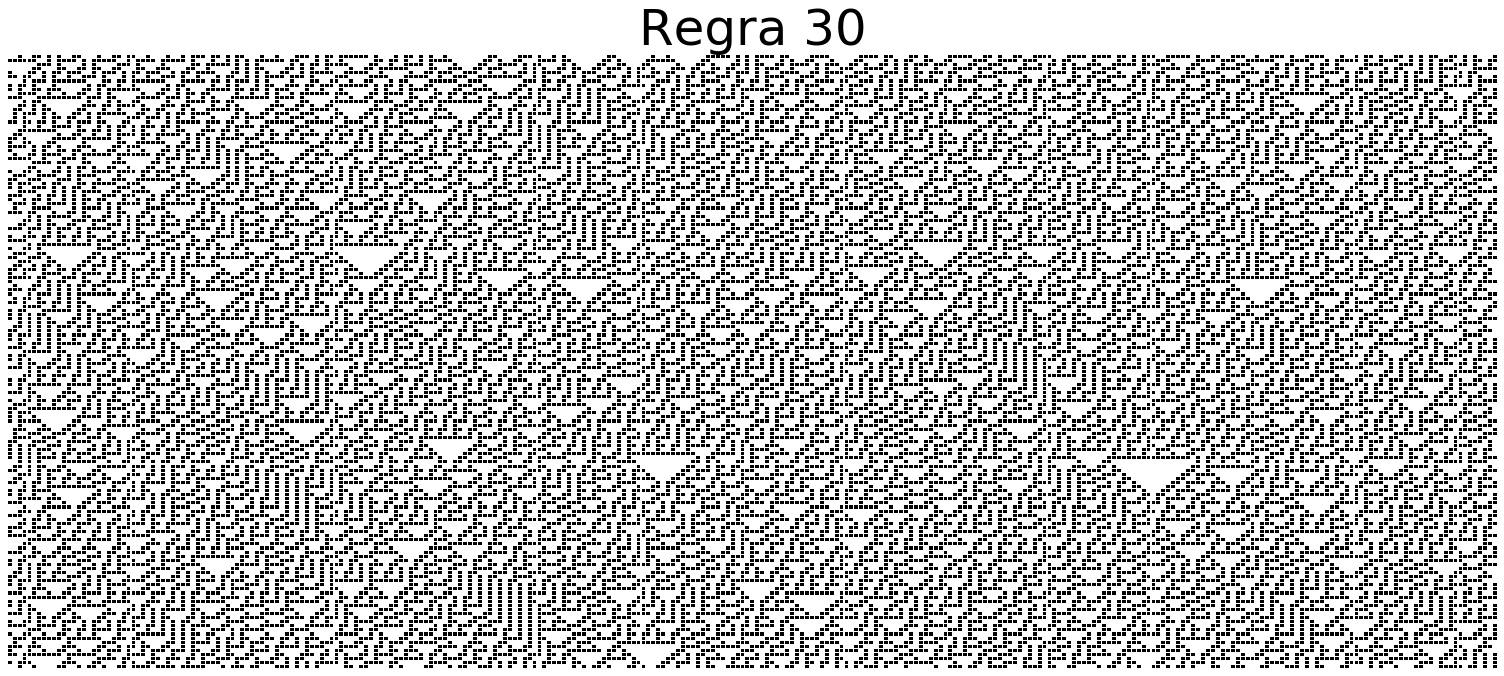

<Figure size 432x288 with 0 Axes>

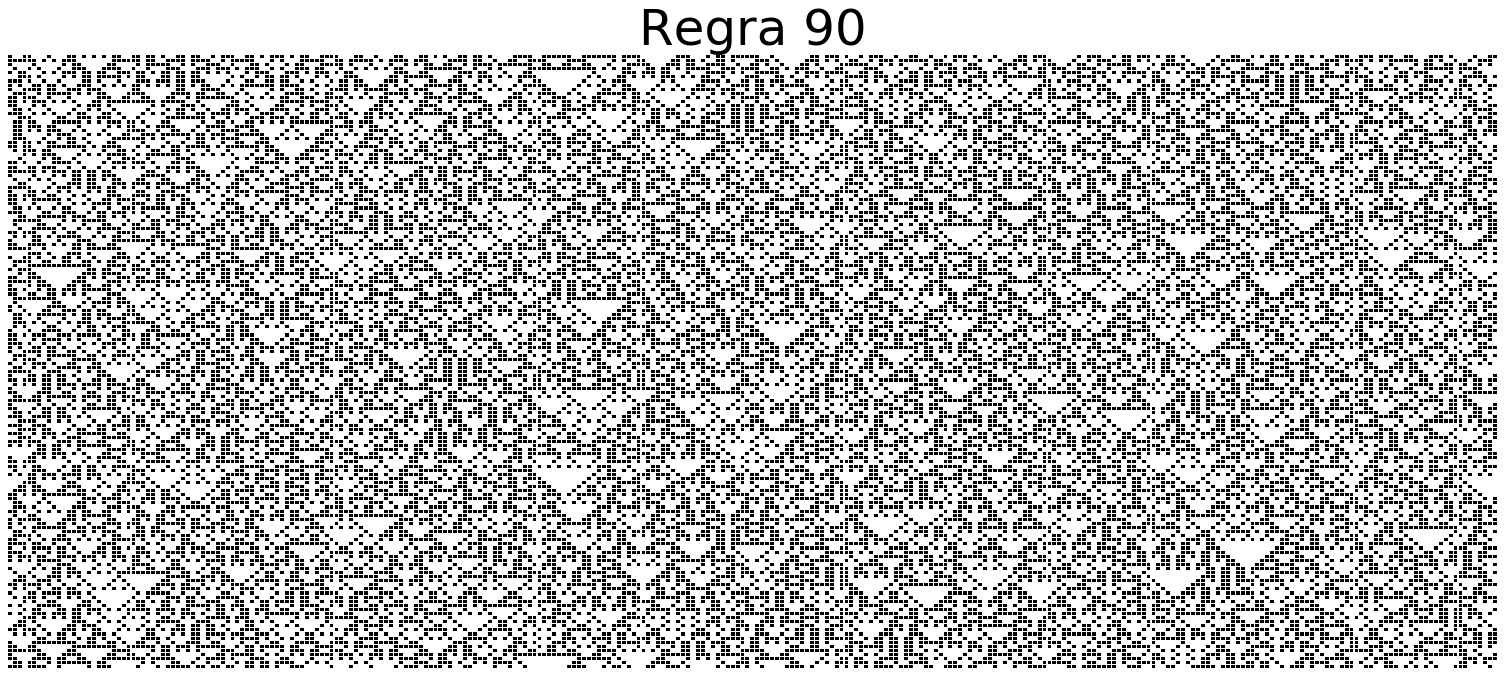

<Figure size 432x288 with 0 Axes>

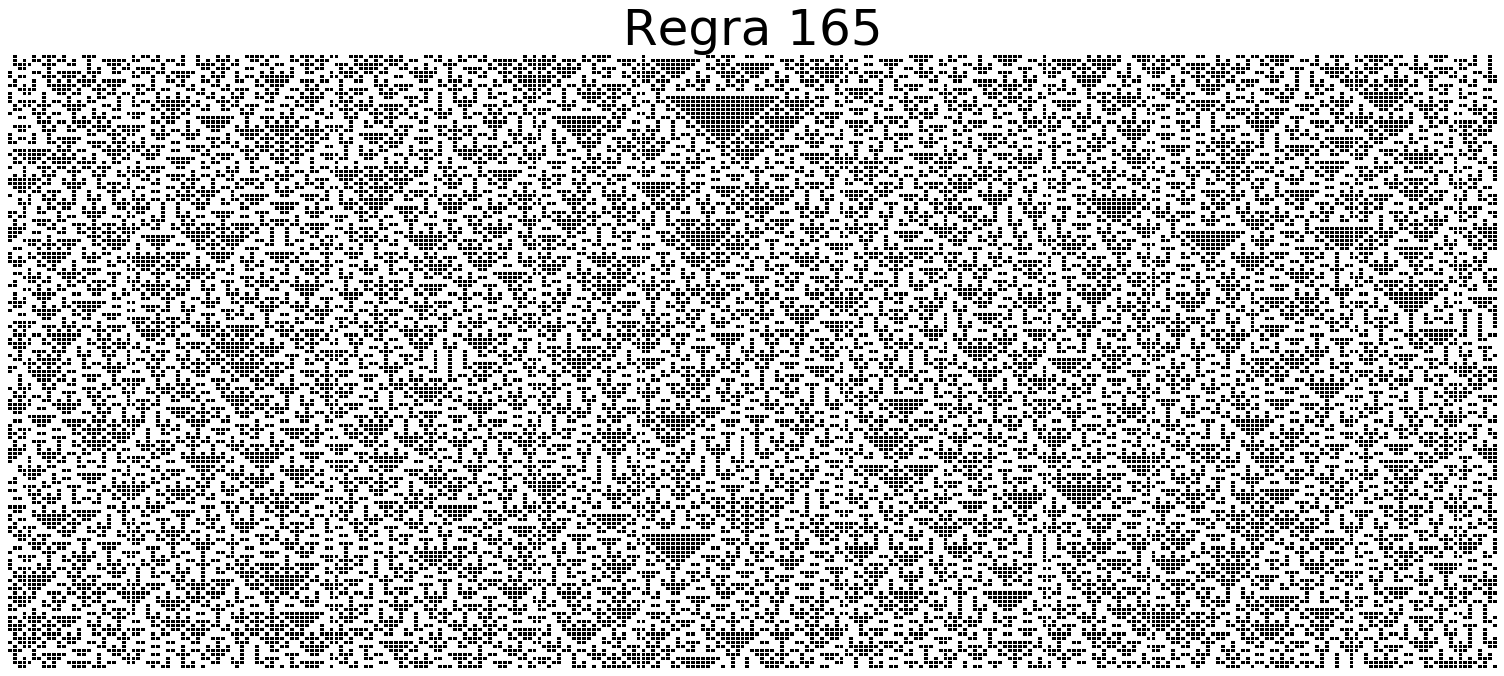

<Figure size 432x288 with 0 Axes>

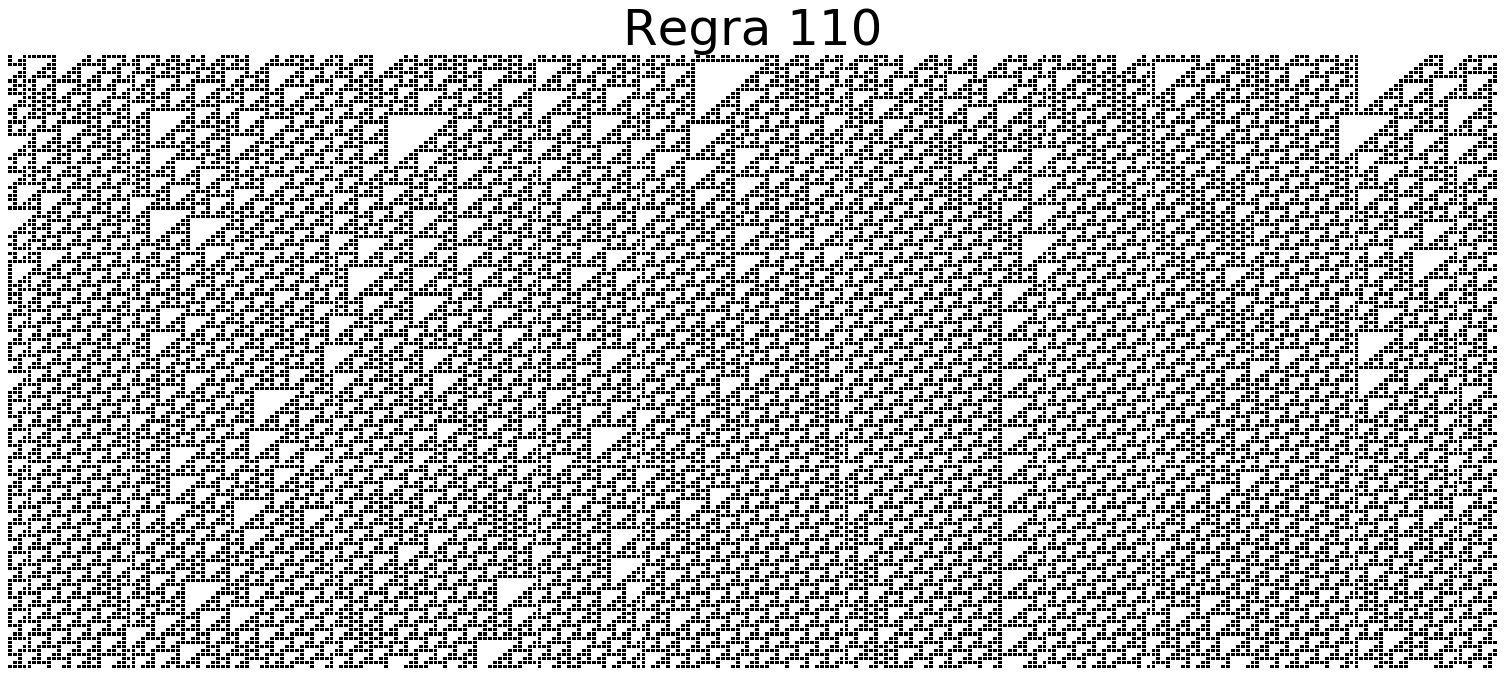

<Figure size 432x288 with 0 Axes>

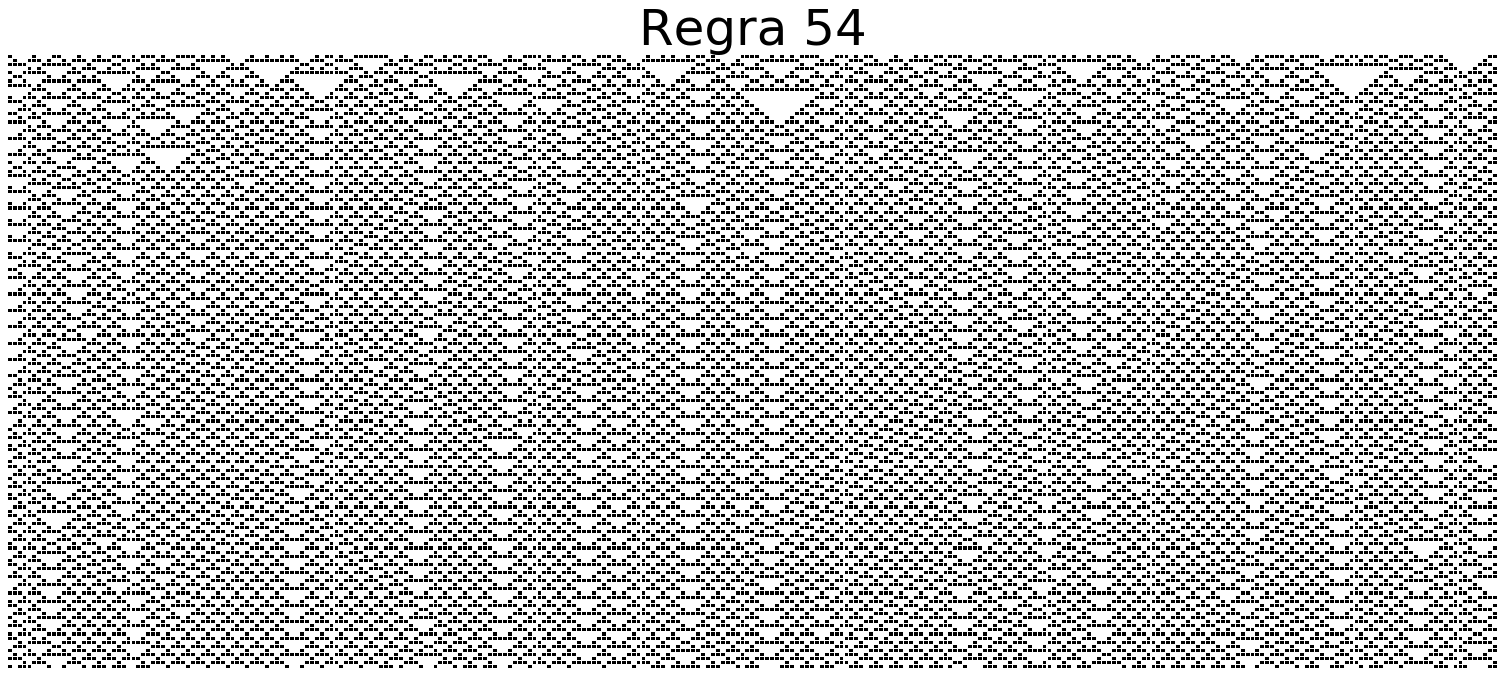

<Figure size 432x288 with 0 Axes>

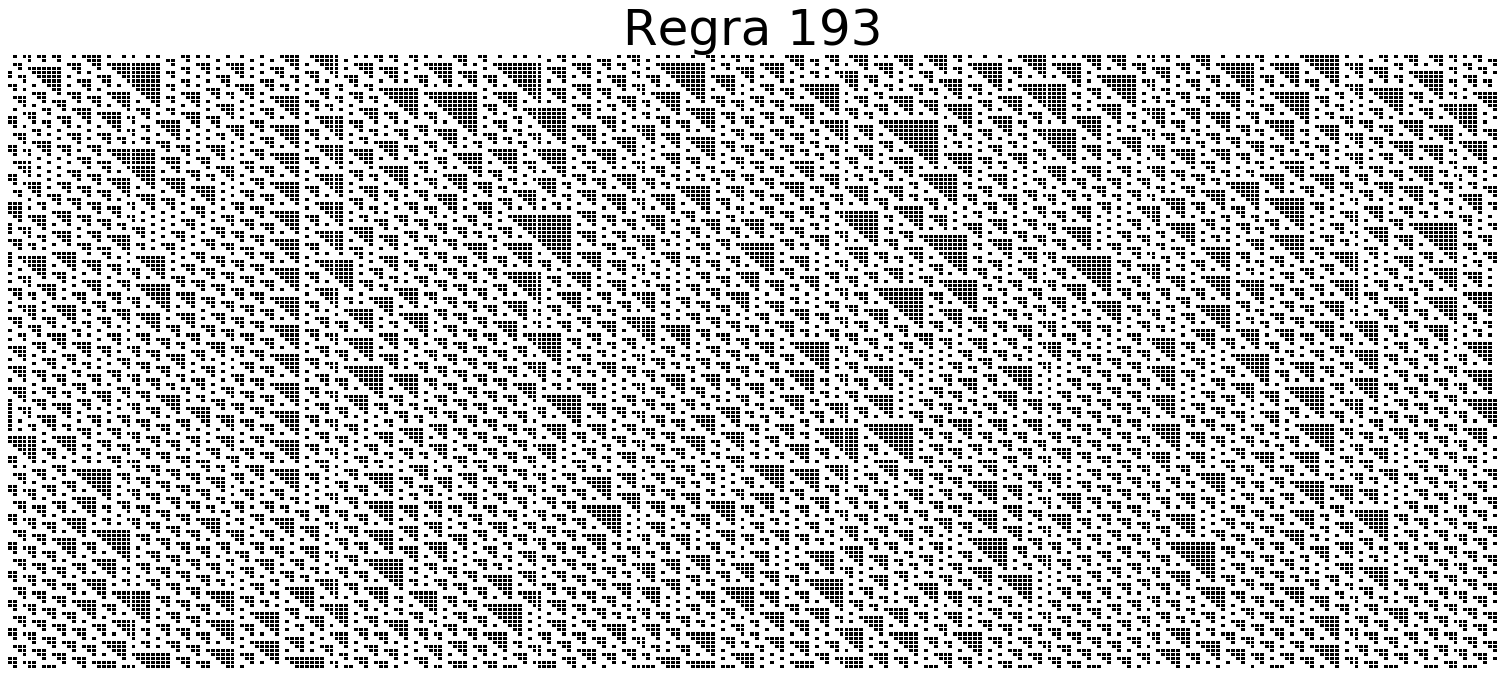

<Figure size 432x288 with 0 Axes>

In [120]:
class1 = [0,32,248]
class2 = [1,4,34]
class3 = [30,90,165]
class4 = [110,54,193]
Steps, Random = 150, True

#Visualização de todos os padrões gerados, demora um pouco 
for classe in [class1, class2, class3, class4]:
    for rule in classe:
        Automato(Steps, rule, Random).Plot()


# Comparação visual da evolução de regras de uma mesma classe


### Fiz o cálculo da linha menos a anterior para identificar o surgimento de padrões

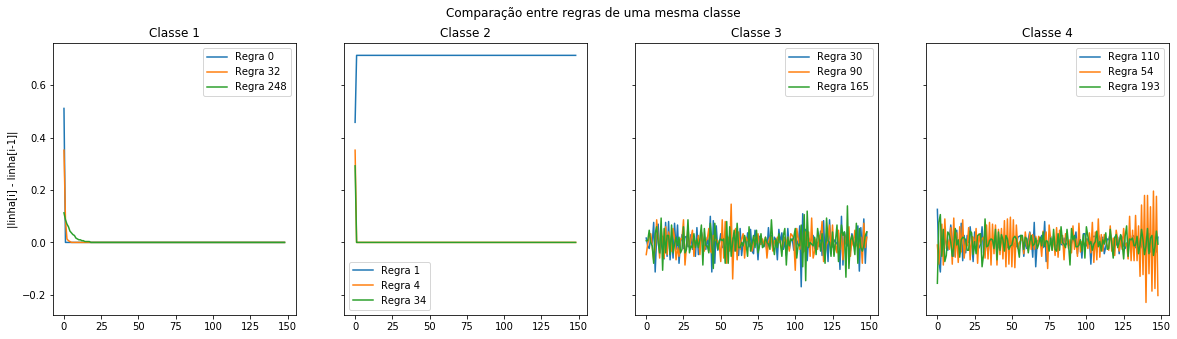

In [13]:
class1 = [0,32,248]
class2 = [1,4,34]
class3 = [30,90,165]
class4 = [110,54,193]

steps,random = 150, True
fig, [axs1,axs2,axs3, axs4] = plt.subplots(1, 4, figsize=(20, 5), sharey = True, sharex = True)
fig.suptitle("Comparação entre regras de uma mesma classe")
axs1.set_ylabel('|linha[i] - linha[i-1]|')


for j in range(3):
    automato = []
    for classe in [class1, class2, class3, class4]:
        automato.append(Automato(steps, classe[j], random))

    C1,C2,C3,C4 = [],[],[],[]

    for i in range(1,steps):
        C1.append(np.mean(automato[0].Cellular_Automaton[i]-automato[0].Cellular_Automaton[i-1]))
        C2.append(np.mean(automato[1].Cellular_Automaton[i]-automato[1].Cellular_Automaton[i-1]))
        C3.append(np.mean(automato[2].Cellular_Automaton[i]-automato[2].Cellular_Automaton[i-1]))
        C4.append(np.mean(automato[3].Cellular_Automaton[i]-automato[3].Cellular_Automaton[i-1]))

    axs1.plot(np.absolute(C1), label= "Regra %d" %(class1[j]))
    axs2.plot(np.absolute(C2), label= "Regra %d" %(class2[j]))
    axs3.plot((C3), label= "Regra %d"%(class3[j]))
    axs4.plot((C4), label= "Regra %d" %(class4[j]))

i = 1
for ax in [axs1,axs2,axs3, axs4]:
    ax.set_title("Classe %d" %(i))

    ax.legend()
    i+=1

#plt.savefig("anal_classes.png", dpi = 200)
plt.show()


# Testes Estatísticos 
---
### Implementar baseado no arquivo Amanda2012.pdf:
- [x] Teste de frequencia
- [X] Teste de corrida
- [ ] Teste de sobreposição de padrão

## Teste de frequência

### Descrição do teste 

(1) Conversão em ±1: 
    Os 0’s e 1’s da sequência de entrada (E) são convertidos respecti-vamente em valores de -1 e 1 e são somados para produzir $S_n=X_1+X_2+...+X_n$, onde $X_i= 2E_i−1$.
Por exemplo, se $E= 0010101001$, então $n= 10$ e $Sn= (−1) + (−1) + 1 + (−1) + 1 +(−1) + 1 + (−1) + (−1) + 1 =−2$.

(2) Calcular o valor de $S_{obs}=\frac{|Sn|}{\sqrt n}$. 
    Para o exemplo desta seção:
    $S_{obs}=\frac{|−2|}{\sqrt{10}}= 0,6324$.
    
(3) Calcular o $p_{valor} = erfc(\frac{S_{obs}}{\sqrt{2}})$, onde erfc é a função erro complementar definida na Seção A.1 do Apêndice A.
    Para o exemplo desta seção:
    $p−valor=erfc(\frac{S_{obs}}{\sqrt{2}}) = 0,5270$.

In [122]:
import scipy.special as sp

def freq(S):
    S = S*2 - 1 # coloca no intervalo [-1,1]
    Sn = np.sum(S)
    Sobs = abs(Sn)/(S.size**0.5)
    #print(Sobs) #retorna a soma
    pvalue = sp.erfc(Sobs/(2**0.5))
    if(pvalue >0.1): print("Passou :0")
    else: print("Não passou :<")
    return pvalue


#Validação
# E= np.array([0,0,1,0,1,0,1,0,0,1])
# print(freq(E))
# E = E*2 - 1 # coloca no intervalo [-1,1]
# Sobs = abs(np.sum(E))/(E.size**0.5)
# print(Sobs) #retorna a soma
# pvalue = sp.erfc(Sobs/(2**0.5))
# print(pvalue)


print("Teste de frequencia")
#Validação        
E= np.array([0,0,1,0,1,0,1,0,0,1])
print("Exemplo da Tese:")
print("Resultado %f, Esperado: 0.5270\n" %freq(E))


#Teste com as 4 classes
for i in range(len(automato)):
    print("Classe %d" %(i+1))
    print("Resultado: %f \n"%freq(automato[i].Cellular_Automaton))

Teste de frequencia
Exemplo da Tese:
Passou :0
Resultado 0.527089, Esperado: 0.5270

Classe 1
Não passou :<
Resultado: 0.000000 

Classe 2
Não passou :<
Resultado: 0.000000 

Classe 3
Passou :0
Resultado: 0.887723 

Classe 4
Não passou :<
Resultado: 0.000000 





## Teste de Corrida

### Descrição do teste

(1) Calcular um pré-teste da proporção de $\pi$ na sequência de entrada: $\frac{\sum_{j}E_j}{n}$. 
Por exemplo se $E= 1010110010$, então
$n=10$ e $π=\frac{5}{10}=\frac{1}{2}$.

(2) Para determinar se o pré-teste foi aprovado, basta realizar a seguinte verificação: se $|π−1/2|< τ$, onde $τ=2√n$. Caso contrário o teste não precisa ser mais realizado, pois elenão foi aprovado no pré-requisito.
Para o exemplo desta seção:$τ= 0,63246$, então $|π−1/2| = 0 < τ$.

(3) Calcular $ν_n(obs) =∑^{n−1}_{k=1}r(k) + 1$, onde $r(k)= 0$ se $Ek=Ek+1er(k)= 1$ caso contrário.
Para o exemplo desta seção temos:$ν_{10=} (1+1+1+1+0+1+0+1+1)+1 = 8$.

(4) Calcular o $p−valor=erfc(|νn(obs)−2nπ(1−π)|2√2nπ(1−π))$, onde erfc é a função erro complementar descrita na Seção A.1 do Apêndice A.
Para o exemplo desta seção: $p−valor= 0,05777$.

In [118]:
#Função da Corrida
def run(E):
    pi = np.sum(E)/E.size
#     print(pi)
    #pré-teste
    tau = 2/E.size**0.5
#     print(tau)
    pre = abs(pi - 0.5)
    if (pre < tau):
        print("Passou :0")
    else:
        print("Não passou :<")
    return pre
        #Não implementei o restante do teste pq só a classe 3 passa 

    
print("Teste de Corrida")    
#Validação        
E= np.array([1,0,1,0,1,1,0,0,1,0])
print("Exemplo da Tese:")
print("Resultado %f, Esperado: 0\n" %run(E))
    
for i in range(len(automato)):
    print("Classe %d" %(i+1))
    print("Resultado: %f \n"%run(automato[i].Cellular_Automaton))

Teste de Corrida
Exemplo da Tese:
Passou :0
Resultado 0.000000, Esperado: 0

Classe 1
Não passou :<
Resultado: 0.483322 

Classe 2
Não passou :<
Resultado: 0.275460 

Classe 3
Passou :0
Resultado: 0.000332 

Classe 4
Não passou :<
Resultado: 0.061373 

